In [ ]:
%matplotlib inline

import matplotlib
import numpy as np
import matplotlib.pyplot as plt

import re
from slackclient import SlackClient
import datetime
import pandas as pd
import matplotlib

slack_api_key = pd.read_csv('access.csv')
slack_api_key = slack_api_key.set_index("name", drop = False)

In [ ]:
slack_key = slack_api_key.loc['slack',]['key']

In [ ]:
sc = SlackClient(slack_key)
def getUsers(sc):
    users = sc.api_call("users.list")
    user_df = pd.DataFrame()
    for user in users['members']:
        profile = user['profile']
        name = profile['real_name']
        user_id = user['id']
        df = pd.DataFrame([(profile['real_name'],user['id'])])
        user_df = user_df.append(df)
    user_df.columns = ['Name', 'userId']
    return(user_df)

def getChannels(sc):
    channels = sc.api_call("conversations.list",limit=1000)
    chanels['channels'][1]
    lst = []
    j=0
    for ch in chanels['channels']:
        created_at = (datetime.datetime.fromtimestamp(int(ch['created'])).strftime('%Y-%m-%d %H:%M:%S'))
        row = [j,created_at,ch['creator'],ch['name'],ch['previous_names'],ch['id']]
        lst.append(row)
        j=j+1
    channels_df = pd.DataFrame(lst)
    channels_df.columns = ['index','date_created','channel_creator_id','channel_name','channel_comment','channel_id']
    return(channels_df)

def getChannelMessages(sc,channel_name):
    channels_df = getChannels(sc)
    channels_df = channels_df.set_index("channel_name", drop = False)
    channel_id = channels_df.loc[channel_name,]['channel_id']
    data_interactions = pd.DataFrame()
    messages = pd.DataFrame()
    next_cursor = 1
    j=0
    convo = sc.api_call("conversations.history",channel=channel_id,limit=1000)
    while(next_cursor):
        next_cursor=0
        for message in convo['messages']:
            try:
                text_message = message['text']
                created_at = (datetime.datetime.fromtimestamp(int(float(message['ts']))).strftime('%Y-%m-%d %H:%M:%S'))
                df_message = pd.DataFrame([(message['ts'],created_at,message['user'],text_message)])
                messages = messages.append(df_message)
                for v in (re.findall(r'(<@\w+>)', text_message)):
                    v=re.sub("<@","",v)
                    v=re.sub(">","",v)
                    df = pd.DataFrame([(message['ts'],created_at,message['user'],v,text_message)])
                    data_interactions = data_interactions.append(df)
                    #print(j,'timestamp:',created_at,'sender:',message['user'],',',v)
                j=j+1
            except:
                print('error')
                #print(df_message)
        try:
            next_cursor = convo['response_metadata']['next_cursor']
            convo=sc.api_call("conversations.history",channel=channel_id,cursor=next_cursor,limit=1000)
            print(next_cursor)
        except:
            print('No next cursor')
            next_cursor=0
    messages.columns = ['time_unix','time','userId','message']
    messages['datetime'] = pd.to_datetime(messages['time'])
    messages = messages.set_index(['datetime'])
    data_interactions.columns = ['time_unix','time','userId_src','userId_dst','message']
    return(data_interactions,messages)



In [148]:
user_df = getUsers(sc)
channels_df = getChannels(sc)
(interactions,messages) = getChannelMessages(sc,'watercooler')

error
error
bmV4dF90czoxNTE5NzMyMjI3MDAwMjg1
error
error
error
bmV4dF90czoxNTEzMTcyMzMxMDAwNTMw
bmV4dF90czoxNTA4NDAyMTEzMDAwNDMz
error
error
error
bmV4dF90czoxNTA0MTY5MjcyMDAwMjY5
error
error
error
bmV4dF90czoxNDk4NjM5MDU0MTgwMDAw
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
bmV4dF90czoxNDkzNzEyMTgxNTMxMTA2
error
error
error
error
error
error
bmV4dF90czoxNDkwMTgzNzc5NDUwODIw
error
error
error
error
error
error
error
error
error
error
error
error
bmV4dF90czoxNDg1OTU0NjIwMDAwMTAz
error
error
error
error
error
error
error
error
error
error
bmV4dF90czoxNDgxNTUzMjc1MDAwMzEz
error
error
error
error
bmV4dF90czoxNDc4NjE4NjU2MDAxNzM2
error
error
error
error
error
bmV4dF90czoxNDc1MjM0MzI5MDAwNTA0
error
error
error
bmV4dF90czoxNDcyNzk4NzkxMDAwMzIz
error
error
bmV4dF90czoxNDcwODM0MjU1MDAwNDYy
error
error
error
error
error
error
error
bmV4dF90czoxNDY3MjczNDU0MDAwNTU3
error
error
error
error
error
error
bmV4dF90czoxNDY0MjQ3MTI1MDAwNDYx
error
error
bmV4dF9

In [154]:
interactions.sort_values('time_unix',ascending=False)

,time_unix,time,userId_src,userId_dst,message
0,1525429870.000183,2018-05-04 12:31:10,U0J4WEKJQ,U0JB12KS7,Absolutely Beautiful <@U0JB12KS7>!!!
0,1525429564.000211,2018-05-04 12:26:04,U0J670FRC,U0JB12KS7,Oh my gosh!! What an amazing wedding <@U0JB12K...
0,1525429044.000193,2018-05-04 12:17:24,U0CJAAB7V,U0JB12KS7,Awesome <@U0JB12KS7> Looks really magical! :ch...
0,1525423677.000378,2018-05-04 10:47:57,U0J5275R7,U0JB12KS7,WOW WOW WOW. Amazing pics! Congrats again <@U...
0,1525420981.000264,2018-05-04 10:03:01,U0PLV2P1V,U0JB12KS7,Wow <@U0JB12KS7>
0,1525417318.000157,2018-05-04 09:01:58,U0JN8M84D,U0JB12KS7,Wow <@U0JB12KS7>! Looks like a fairytale weddi...
0,1525417051.000256,2018-05-04 08:57:31,U1M2J206R,U0JB12KS7,those pics are amazing <@U0JB12KS7> :fire:
0,1525417033.000095,2018-05-04 08:57:13,U0L9CKSKA,U0JB12KS7,<@U0JB12KS7> It is sooo beautiful and magical....
0,1525416705.000233,2018-05-04 08:51:45,U15JMNEN7,U0JB12KS7,:tada: :fire:Congrats <@U0JB12KS7> :smile:
0,1525376546.000306,2018-05-03 21:42:26,U880U037F,U0JB12KS7,<@U0JB12KS7> - this is AMAZING!!! What a spect...


In [150]:
messages_labelled = pd.merge(messages,user_df,on='userId')
interactions_labelled = pd.merge(interactions,user_df,left_on='userId_src',right_on='userId',indicator=True).merge(user_df,left_on='userId_dst',right_on='userId')

In [151]:
messages_labelled.to_csv('watercooler_messages.csv')
interactions_labelled.to_csv('watercooler_interactions.csv')

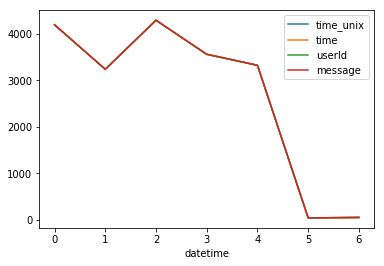

In [152]:
messages.groupby(messages.index.dayofweek).count().plot()
df1 = messages.groupby(messages.index.dayofweek).size()